In [1]:
import sqlite3
import pandas as pd
import numpy as np
import tensorflow
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical 


In [2]:
conn = sqlite3.connect('MatchDB.db')
df = pd.read_sql_query("SELECT * FROM Expected_Games", conn)

In [3]:
df = df.drop(['HomeTeam', 'AwayTeam', 'League', 'Country', 'date', 'id', 'match_id', 'HGames', 'AGames'], axis=1)
# df = df.drop(['xAwayPoss', 'xAwayShots', 'xAwaySonT', 'xAwaySoffT', 'xAwayBS', 'xAwayCor', 'xAwayOff', 'xAwayFoul', 'xAwayYellow', 'xAwayPass', 'xAwayAccPass', 'xAwayPassOff', 'xAwayAccLongB', 'xAwayAccLongBpercent', 'xAwayAccCross', 'xAwayAccCrosspercent', 'xAwaySuccDribb', 'xAwaySuccDribbpercent', 'xAwayDuelsW', 'xAwayTackW', 'xAwayTackWpercent', 'xAwayInt', 'xAwayClear'], axis= 1)
# df = df.drop(['xHomeSoffT', 'xAwaySoffT', 'xHomeBS', 'xAwayBS'], axis= 1)
# df = df.drop(df.iloc[: , 10:], axis= 1)
df = df.dropna()
df

,HGoals,AGoals,xHomePoss,xAwayPoss,xHomeShots,xAwayShots,xHomeSonT,xAwaySonT,xHomeSoffT,xAwaySoffT,...,xHomeDuelsW,xAwayDuelsW,xHomeTackW,xAwayTackW,xHomeTackWpercent,xAwayTackWpercent,xHomeInt,xAwayInt,xHomeClear,xAwayClear
0,0,0,46.72,53.28,17.07,11.48,9.39,3.45,7.68,8.03,...,43.43,44.32,15.60,6.82,77.72,53.89,12.68,5.18,14.25,16.86
1,2,5,48.25,51.75,14.58,13.41,3.18,3.42,11.40,9.99,...,42.38,54.45,9.10,7.07,65.81,50.01,9.87,9.01,12.11,12.17
2,3,3,44.63,55.37,12.50,16.33,3.10,9.33,9.40,7.00,...,58.91,55.47,16.52,12.86,60.56,64.42,17.50,11.79,15.27,18.11
3,3,2,55.79,44.21,11.67,14.20,3.34,3.48,8.33,10.72,...,53.21,50.52,8.01,8.40,75.37,71.33,6.26,8.59,20.84,16.00
4,0,0,56.06,43.94,13.95,8.43,4.66,3.11,9.29,5.32,...,47.08,47.86,8.62,9.64,51.12,72.19,3.56,4.54,13.00,16.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25878,2,1,39.74,60.26,14.42,13.32,3.61,3.63,10.81,9.69,...,55.94,56.19,10.94,8.85,64.01,67.98,10.30,7.09,24.77,16.78
25879,1,0,53.59,46.41,15.18,10.51,5.18,3.34,10.00,7.17,...,49.54,47.49,11.99,10.06,65.49,65.10,9.48,11.88,15.35,17.66
25880,1,1,59.57,40.43,15.76,10.29,4.94,2.82,10.82,7.47,...,44.79,41.97,9.87,13.03,75.15,67.96,10.76,11.77,13.73,21.00
25881,2,0,61.34,38.66,24.09,9.22,7.34,3.16,16.75,6.06,...,62.90,61.90,11.47,10.38,61.22,68.30,12.36,9.36,14.46,32.26


In [4]:
def compare_values(row):
    if row['HGoals'] > row['AGoals']:
        return 0
    elif row['AGoals'] == row['HGoals']:
        return 1
    else:
        return 2
    
df['Winner'] = df.apply(compare_values, axis= 1)

# def compare_values(row):
#     if row['HGoals'] > row['AGoals']:
#         return 0
#     else:
#         return 1
    
df['Winner'] = df.apply(compare_values, axis= 1)

In [5]:
df['Winner'].value_counts()

0    11266
2     7852
1     6765
Name: Winner, dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [7]:
prediction = df.drop(['HGoals', 'AGoals', 'Winner'], axis=1).astype(float)
target_1 = df['Winner'].astype(float)
target_1 = to_categorical(target_1)

# scaled_pred = scale.fit_transform(prediction)
# scaled_target = scale.fit_transform(target_1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(prediction, target_1, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(scaled_pred, scaled_target, test_size=0.2, random_state=42)

In [9]:
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [10]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

In [11]:
n_cols = len(prediction.columns)
input_shape = (n_cols,)
input_shape

(48,)

In [12]:
lr_schedule = tensorflow.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

optimizer = tensorflow.keras.optimizers.Adam(learning_rate=lr_schedule)

model = Sequential()

model.add(Dense(500, activation = 'relu', input_shape = input_shape))
model.add(BatchNormalization())
model.add(Dense(500, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(250, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(100, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='sigmoid'))

early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 15)

model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train,
                 validation_split = 0.2,
                 epochs = 500,
                 callbacks = [early_stopping]
                )

Epoch 1/500
518/518 [==============================] - 5s 6ms/step - loss: 0.6245 - accuracy: 0.4485 - val_loss: 0.6058 - val_accuracy: 0.4669
Epoch 2/500
518/518 [==============================] - 3s 6ms/step - loss: 0.6079 - accuracy: 0.4754 - val_loss: 0.6742 - val_accuracy: 0.4283
Epoch 3/500
518/518 [==============================] - 3s 6ms/step - loss: 0.6052 - accuracy: 0.4751 - val_loss: 0.6407 - val_accuracy: 0.4300
Epoch 4/500
518/518 [==============================] - 3s 5ms/step - loss: 0.6033 - accuracy: 0.4778 - val_loss: 0.6133 - val_accuracy: 0.4466
Epoch 5/500
518/518 [==============================] - 3s 6ms/step - loss: 0.6030 - accuracy: 0.4781 - val_loss: 0.8477 - val_accuracy: 0.3170
Epoch 6/500
518/518 [==============================] - 3s 6ms/step - loss: 0.6037 - accuracy: 0.4787 - val_loss: 0.6087 - val_accuracy: 0.4599
Epoch 7/500
518/518 [==============================] - 3s 6ms/step - loss: 0.6028 - accuracy: 0.4773 - val_loss: 0.6060 - val_accuracy: 0.4763

In [13]:
result = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.6089 - accuracy: 0.4700


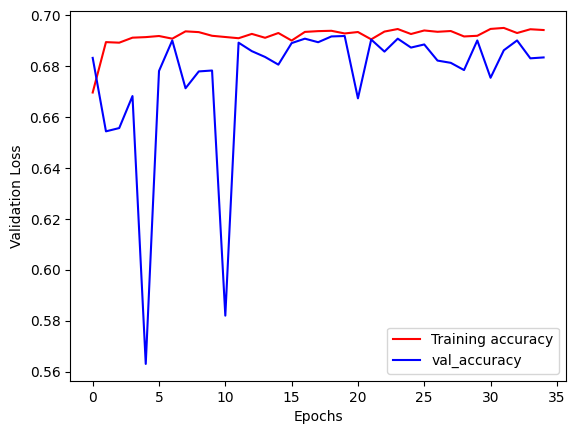

In [14]:
plt.plot(np.sqrt(hist.history['accuracy']), 'r', label='Training accuracy')
plt.plot(np.sqrt(hist.history['val_accuracy']), 'b', label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

In [15]:
print(hist.history['accuracy'])
best_score = max(hist.history['accuracy'])
# best_score2 = min(hist.history['val_loss'])
print(best_score)

[0.448502779006958, 0.47542864084243774, 0.4751267731189728, 0.4778435230255127, 0.4781453609466553, 0.4787490963935852, 0.47730016708374023, 0.4812847077846527, 0.4808621108531952, 0.47886982560157776, 0.47820574045181274, 0.47754165530204773, 0.4798961579799652, 0.4777831435203552, 0.4803791344165802, 0.4762738347053528, 0.48098284006118774, 0.48140546679496765, 0.4815865755081177, 0.4801376461982727, 0.48092249035835266, 0.4769379496574402, 0.48116397857666016, 0.48255252838134766, 0.47983577847480774, 0.4817676842212677, 0.4810432195663452, 0.48146581649780273, 0.4785076081752777, 0.47886982560157776, 0.4826129078865051, 0.4831562340259552, 0.4803791344165802, 0.4824317693710327, 0.4820091724395752]
0.4831562340259552


In [16]:
predictions = model.predict(X_test)
import numpy as np
predicted_classes = np.argmax(predictions, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

162/162 [==============================] - 0s 2ms/step


In [28]:
predicted_classes

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
game = 700
# print(round(predictions[game][0]*100,2),"%")
# print(round(predictions[game][1]*100,2),"%")
# print(round(predictions[game][2]*100,2),"%")
total_value = round(predictions[game][0]*100,2) + round(predictions[game][1]*100,2) + round(predictions[game][2]*100,2)
print(round(predictions[game][0]*10000 / total_value,2),"%")
print(round(predictions[game][1]*10000 / total_value,2),"%")
print(round(predictions[game][2]*10000 / total_value,2),"%")
# print(round(predictions[game][0]*10000 / total_value,2) + round(predictions[game][1]*100 / total_value,2) + round(predictions[game][2]*100 / total_value,2))
print(predicted_classes[game])
print(y_test_classes[game])
print(X_test.iloc[game])


39.9 %
28.06 %
32.05 %
0
2
xHomePoss                 58.34
xAwayPoss                 41.66
xHomeShots                15.65
xAwayShots                 9.78
xHomeSonT                  5.39
xAwaySonT                  3.45
xHomeSoffT                10.26
xAwaySoffT                 6.33
xHomeBS                    4.33
xAwayBS                    2.55
xHomeCor                   6.08
xAwayCor                   4.61
xHomeOff                   1.58
xAwayOff                   1.70
xHomeFoul                 12.01
xAwayFoul                 12.76
xHomeYellow                1.98
xAwayYellow                1.54
xHomeRed                   0.02
xAwayRed                   0.03
xHomePass                489.42
xAwayPass                358.33
xHomeAccPass             398.52
xAwayAccPass             259.98
xHomePassOff             161.75
xAwayPassOff             101.31
xHomeAccLongB             26.16
xAwayAccLongB             26.40
xHomeAccLongBpercent      50.05
xAwayAccLongBpercent      43.39
xHomeAccCross

In [19]:
model.save('football_predict_test.h5')

c:\Users\simon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


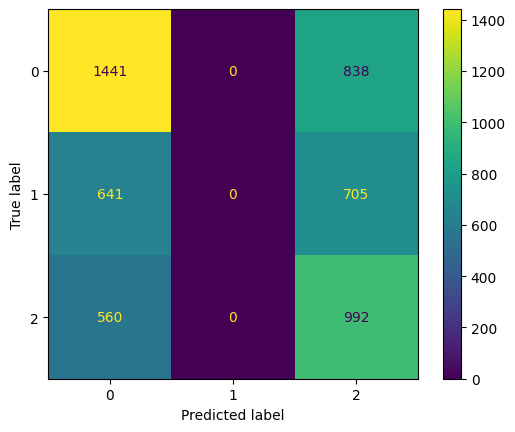

In [21]:
result = confusion_matrix(y_test_classes, predicted_classes)
disp = ConfusionMatrixDisplay(result)
disp.plot()

In [22]:
# import keras_tuner
# from tensorflow import keras

In [23]:
# def build_model(hp):
#     model2 = Sequential()
#     model2.add(Dense(
#         hp.Choice('units', [100, 150, 200, 250]),
#         activation = 'relu'))
#     model2.add(BatchNormalization())
#     model2.add(Dense(
#         hp.Choice('units', [100, 150, 200, 250]),
#         activation = 'relu'))
#     model2.add(BatchNormalization())
#     model2.add(Dense(
#         hp.Choice('units', [100, 150, 200, 250]),
#         activation = 'relu'))
#     model2.add(BatchNormalization())
#     model2.add(Dense(1))
#     model2.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])
#     return model2

In [24]:
# tuner = keras_tuner.RandomSearch(
#     build_model,
#     objective='val_loss',
#     max_trials = 100)

In [25]:
# tuner.search(X_train, y_train, validation_split = 0.2)
# best_model = tuner.get_best_models(num_models=1)[0]

In [26]:
# predictions = best_model.predict(X_test)
# import numpy as np
# predicted_classes = np.argmax(predictions, axis=1)
# y_test_classes = np.argmax(y_test, axis=1)